# Programming with the ZX-calculus

In this lab session we will be working with PyZX, a library in Python that allows us to manage ZX-diagrams and use the ZX-calculus to optimise circuits. PyZX's documentation can be found at: https://pyzx.readthedocs.io/en/latest/index.html.

We will also look at its interaction with the two other Python libraries that we have seen in lectures. Qiskit is a quantum software development kit that aims to cover the entire quantum programming pipeline. OpenQASM is a low-level intermediate representation that allows specification of quantum circuit operations.

The aim of this lab is not to become fluent in any of the languages, but to give a taste of which things in class have already been automated and how some things are easier to express than others.

If you find anything that you don't like, maybe *you* can be someone who makes it better!

First install the libraries and import them if you don't already have them.

In [ ]:
%pip install pyzx
%pip install qiskit
%pip install openqasm3
%pip install matplotlib

In [2]:
import pyzx as zx
import qiskit
import openqasm3

# Overview

We have been discussing the values of different quantum programming representations throughout the semester. The exercises here have been chosen to give you the chance to think about them for yourself. We will focus on interacting with ZX-based representations.  

There are two main exercises provided in this document - each provides a code example for you to implement, then asks you to use some of the features in the systems more creatively. Each then has a couple of more open-ended questions for us to discuss in class.

### ! There is more work here than you are expected to do. Pick one or two questions to work through and discuss your thoughts with your peers. !

### Overarching Questions

 1. When you write a program, is it easy to tell what it does? Why? 
 2. What ways can you see a program being optimised? Are these easy to spot?
 3. Can you write other programs that are similar to the ones we have written?

## Introduction

This section has all of the tools you need to do any of the other exercises.

## Questions: What is ZX for?
### 1. Synthesis
- a. Synthesising a classical program from a matrix

### 2. Optimisation
- a. Circuit optimisation
- b. Targeting real quantum hardware

### 3. Simulation
If you wish, you can also try simulating the results of your quantum programs with Qiskit. This is not an explicit question.

# Introduction

Let's go through making and visualising circuits and zx-diagrams. All of the cells in this section can just be run for reference.

[*This section is a modified version of a combination of the one available at https://github.com/Quantomatic/pyzx, created by Aleks Kissinger and John van de Wetering and changes made previously by Pablo Andrés-Martínez and Robert I. Booth.*]

To make and edit ZX-diagrams directly go to this page: https://pyzx.readthedocs.io/en/latest/graph.html#the-zx-diagram-editor

## PyZX and Circuits

We can use PyZX to create ZX diagrams, circuits, and ZX-diagrams that equate to circuits.

One example, which we will see in lectures, are Clifford circuits. A Clifford circuit is a ZX- circuits whose phases are all multiples of $\pi/2$. They are easy to manage because the axioms of the original ZX-calculus are enough to prove any equivalence of Clifford circuits. 

We will now use PyZX to create a random Clifford circuit and visualise it.

In [3]:
import random
qubit_amount = 4
depth = 15
random.seed(1337)
circ = zx.generate.cliffords(qubit_amount, depth)
zx.draw_d3(circ,labels=True)

The green and red nodes represent Z- and X-phase gates respectively, the yellow boxes are Hadamard gates, and the vertical lines going between two different colored nodes are CNOT gates.

We can get the circuit representation for this and look at which gates are in it.

#### N.B. If you use zx.extract, the circuit *will* become empty, so you can't use it after this. You can use .copy() to get one to extract without editing your original circuit.

In [4]:
c = circ.copy()
c = zx.extract.extract_circuit(c)
print(c.stats())

Circuit  on 4 qubits with 61 gates.
        0 is the T-count
        61 Cliffords among which
        7 2-qubit gates (0 CNOT, 7 other) and
        34 Hadamard gates.


[*Aside*] If you look carefully, you might notice that converting all of the dots directly to gates would have given you 30 gates and two CNOT gates, but the circuit stats are not this. Why might this be?

(You can look at the qasm circuit version below)

In [5]:
print(c.to_qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
h q[2];
h q[3];
rz(1.0*pi) q[2];
rz(1.5*pi) q[3];
h q[2];
h q[3];
rz(1.0*pi) q[2];
rz(1.5*pi) q[3];
h q[2];
h q[3];
cz q[2], q[3];
rz(1.0*pi) q[2];
h q[2];
h q[3];
cz q[2], q[3];
rz(0.5*pi) q[2];
h q[2];
h q[0];
h q[1];
rz(1.0*pi) q[2];
rz(1.5*pi) q[1];
h q[2];
h q[0];
h q[1];
cz q[0], q[1];
rz(1.0*pi) q[2];
h q[2];
h q[0];
h q[1];
rz(0.5*pi) q[2];
rz(0.5*pi) q[3];
rz(1.0*pi) q[0];
rz(0.5*pi) q[1];
h q[2];
h q[3];
h q[0];
h q[1];
cz q[0], q[1];
rz(1.5*pi) q[2];
rz(1.5*pi) q[0];
h q[2];
h q[3];
h q[0];
cz q[0], q[2];
rz(0.5*pi) q[2];
rz(1.5*pi) q[3];
h q[2];
h q[3];
cz q[2], q[3];
h q[2];
h q[2];
h q[1];
h q[0];
cz q[0], q[2];
rz(1.0*pi) q[3];
rz(1.0*pi) q[1];
rz(1.5*pi) q[0];
h q[3];
h q[2];
h q[1];
h q[0];



Internally the ZX diagram of the circuit is represented as a graph:

In [6]:
print(circ)
print("All edges: ", list(circ.edges()))
print("\nThe neighbours of vertex 14: ", list(circ.neighbors(14)))

Graph(46 vertices, 49 edges)
All edges:  [(0, 4), (1, 5), (2, 6), (3, 7), (4, 13), (5, 11), (6, 8), (7, 9), (8, 10), (9, 12), (10, 14), (11, 18), (12, 15), (13, 19), (14, 15), (14, 17), (15, 16), (16, 17), (16, 24), (17, 20), (18, 19), (18, 21), (19, 23), (20, 22), (21, 29), (22, 25), (23, 28), (24, 27), (25, 26), (26, 31), (27, 33), (28, 29), (28, 30), (29, 35), (30, 31), (30, 37), (31, 32), (32, 33), (32, 34), (33, 41), (34, 36), (35, 39), (36, 37), (36, 40), (37, 38), (38, 42), (39, 43), (40, 44), (41, 45)]

The neighbours of vertex 14:  [15, 10, 17]


Using this graph representation we can use the rules of the ZX-calculus to automatically simplify it:

In [7]:
g = circ.copy()
zx.clifford_simp(g)
zx.draw_d3(g)

In [8]:
g.normalize() # Reposition nodes horizontally to look nicer
zx.draw_d3(g)

We can get back circuits from the reduced diagram and see its stats:

In [9]:
c = zx.extract.extract_circuit(g)
print(c.stats())

Circuit  on 4 qubits with 26 gates.
        0 is the T-count
        26 Cliffords among which
        13 2-qubit gates (0 CNOT, 13 other) and
        9 Hadamard gates.


## PyZX <-> Qiskit <-> QASM

We already saw how to go from PyZX to QASM, from this we can also map to a Qiskit circuit:

In [10]:
import random
qubit_amount = 4
depth = 15
random.seed(1337)
circ = zx.generate.cliffords(qubit_amount, depth)
zx.draw_d3(circ)
c = zx.extract.extract_circuit(circ)
qasm_circ = c.to_qasm(3)
print(qasm_circ)

OPENQASM 3;
include "stdgates.inc";
qubit[4] q;
h q[2];
h q[3];
rz(1.0*pi) q[2];
rz(1.5*pi) q[3];
h q[2];
h q[3];
rz(1.0*pi) q[2];
rz(1.5*pi) q[3];
h q[2];
h q[3];
cz q[2], q[3];
rz(1.0*pi) q[2];
h q[2];
h q[3];
cz q[2], q[3];
rz(0.5*pi) q[2];
h q[2];
h q[0];
h q[1];
rz(1.0*pi) q[2];
rz(1.5*pi) q[1];
h q[2];
h q[0];
h q[1];
cz q[0], q[1];
rz(1.0*pi) q[2];
h q[2];
h q[0];
h q[1];
rz(0.5*pi) q[2];
rz(0.5*pi) q[3];
rz(1.0*pi) q[0];
rz(0.5*pi) q[1];
h q[2];
h q[3];
h q[0];
h q[1];
cz q[0], q[1];
rz(1.5*pi) q[2];
rz(1.5*pi) q[0];
h q[2];
h q[3];
h q[0];
cz q[0], q[2];
rz(0.5*pi) q[2];
rz(1.5*pi) q[3];
h q[2];
h q[3];
cz q[2], q[3];
h q[2];
h q[2];
h q[1];
h q[0];
cz q[0], q[2];
rz(1.0*pi) q[3];
rz(1.0*pi) q[1];
rz(1.5*pi) q[0];
h q[3];
h q[2];
h q[1];
h q[0];



Here's the qiskit code you need:

In [ ]:
%pip install qiskit_qasm3_import
%pip install pylatexenc

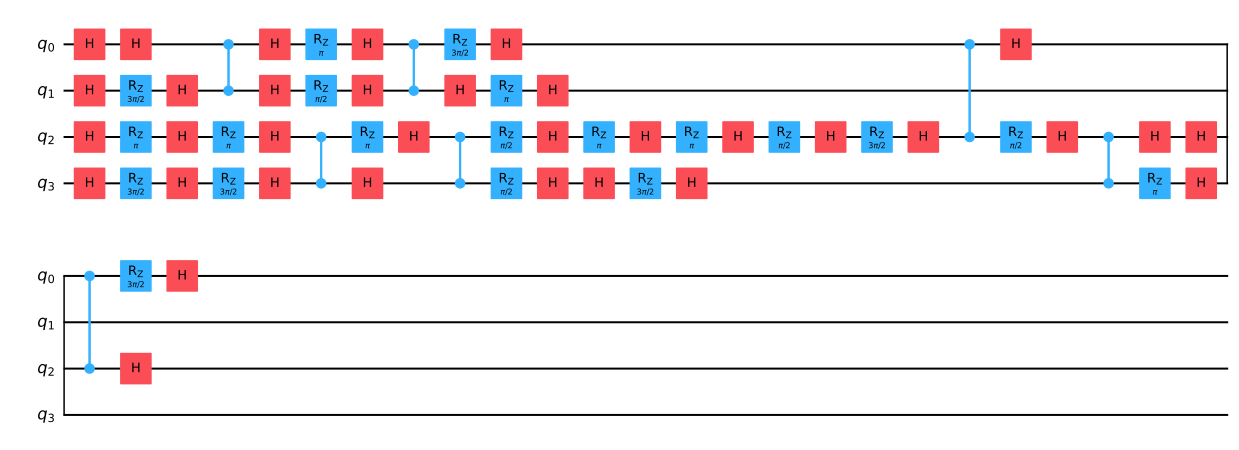

In [12]:
from qiskit import QuantumCircuit
import qiskit.qasm3
qc = qiskit.qasm3.loads(qasm_circ)
qc.draw("mpl")

Then you can go back from Qiskit to QASM:

In [13]:
from qiskit.qasm3 import dumps
 
dumps(qc)

'OPENQASM 3.0;\ninclude "stdgates.inc";\nqubit[4] q;\nh q[2];\nh q[3];\nrz(pi) q[2];\nrz(3*pi/2) q[3];\nh q[2];\nh q[3];\nrz(pi) q[2];\nrz(3*pi/2) q[3];\nh q[2];\nh q[3];\ncz q[2], q[3];\nrz(pi) q[2];\nh q[2];\nh q[3];\ncz q[2], q[3];\nrz(pi/2) q[2];\nh q[2];\nh q[0];\nh q[1];\nrz(pi) q[2];\nrz(3*pi/2) q[1];\nh q[2];\nh q[0];\nh q[1];\ncz q[0], q[1];\nrz(pi) q[2];\nh q[2];\nh q[0];\nh q[1];\nrz(pi/2) q[2];\nrz(pi/2) q[3];\nrz(pi) q[0];\nrz(pi/2) q[1];\nh q[2];\nh q[3];\nh q[0];\nh q[1];\ncz q[0], q[1];\nrz(3*pi/2) q[2];\nrz(3*pi/2) q[0];\nh q[2];\nh q[3];\nh q[0];\ncz q[0], q[2];\nrz(pi/2) q[2];\nrz(3*pi/2) q[3];\nh q[2];\nh q[3];\ncz q[2], q[3];\nh q[2];\nh q[2];\nh q[1];\nh q[0];\ncz q[0], q[2];\nrz(pi) q[3];\nrz(pi) q[1];\nrz(3*pi/2) q[0];\nh q[3];\nh q[2];\nh q[1];\nh q[0];\n'

## Synthesising programs to run on a quantum computer

Synthesis is the process of taking a high-level description of a program and generating an implementation.

a. Synthesising a classical program from a matrix

extra note: Synthesising from arbitrary classical programs

### a. Synthesising a classical program (matrices)

If we start with a description of a classical program, how can we get a quantum program that does the same thing?

If I want to use the quantum program as a subroutine in a *unitary* quantum program, the implementation of the quantum program also has to be *unitary* and therefore *reversible*. There are algorithms for generating these include Bennet's trick. 

The method that Qiskit employs for this is from matrices, and PyZX can also synthesise ZX-diagrams from arbitrary matrices.

As it is a bit of a pain to actually make a matrix for some quantum algorithm, we will just work with deriving one for a classical program for now.

We will consider the 8-bit adder for this exercise. 

The 8-bit adder takes two registers of 8-bits, a and b, and returns a+b on 8 bits and c, the carry.

Either implement this yourself by building the classical circuit (hint for implementation of a 2-bit full adder: https://www.quantum-inspire.com/kbase/full-adder/) or by using Qiskit's inbuilt adders and getting the matrix from them. (https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.FullAdderGate)

In [14]:
def get_matrix_adder_8_bits():
    my_matrix = ...
    return my_matrix

'''
    You might want to use the below code to get the unitary matrix from a circuit. You need to pip install qiskit-aer for this to work.
'''

from qiskit.circuit.quantumcircuit import QuantumCircuit
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT, SGate, SXGate, U1Gate, UnitaryGate, XGate, ZGate, u1 #Here's some example of qiskit gates you might want
from qiskit.circuit.library.generalized_gates import unitary
from qiskit_aer import AerSimulator
import qiskit.quantum_info as qi


def print_unitary(circ):
    simulator = AerSimulator(method = 'unitary')
    circ = transpile(circ, simulator)
    circ.save_unitary()
    #job execution and getting the result as an object
    result = simulator.run(circ).result()
    print(circ)
    unitary = result.get_unitary(circ, decimals=3)
    #get the unitary matrix from the result object
    print("Circuit unitary:\n", np.real_if_close(np.asarray(unitary).round(5)))
    return unitary

In [ ]:
%pip install qiskit-aer

Use qiskit synthesis (https://docs.quantum.ibm.com/api/qiskit/synthesis) and PyZX synthesis (https://pyzx.readthedocs.io/en/latest/api.html#pyzx.linalg.Mat2) to generate both a ZX-diagram and a quantum circuit from your matrix. 

Then, look at their circuit implementations. How do these compare to each other and the original circuit you started with?

In [16]:
def matrix_to_pyzx():
    # Your code here
    ...

def matrix_to_qiskit():
    # Your code here
    ...

#### Side note on turning classical programs into quantum programs

There are some automatic tools for generating quantum programs from classical programs - that take code and produce quantum algorithms. Some examples are [ReverC](https://github.com/msr-quarc/ReVerC) and a tool in the language [Quipper](https://www.mathstat.dal.ca/~selinger/quipper/doc/Quipper-Internal-Classical.html) (which we will see later in the course).

## Optimisation Strategies

- a. Circuit optimisation

- b. Targeting real quantum hardware

### a. Circuit Optimisation

Circuit optimisation is the process of producing an equivalent quantum circuit (i.e. one that implements the same unitary evolution) that typically satisfies at least one of the following:

- has fewer gates of a relevant kind (some gates are more costly than others, particularly, T-gates or two-qubits gates like CNOTs),
- has a shorter maximum sequence of consecutive gates (known as depth-reduction),
- uses less qubits


[*This section is a modified version of the one available at https://github.com/Quantomatic/pyzx, created by Aleks Kissinger and John van de Wetering and incorporates changes made by Pablo Andrés-Martínez and Robert I. Booth.*]

Let's try optimising a Clifford+T circuit (meaning it may include $\pi/4$ phases).

In [17]:
qubit_amount = 6
depth = 70
random.seed(1338)
circ = zx.generate.cliffordT(qubit_amount, depth,p_t=0.2)
zx.draw_d3(circ)
c = zx.extract.extract_circuit(circ)
print(c.stats())
#N.B. zx.extract empties the circuit!

Circuit  on 6 qubits with 162 gates.
        10 is the T-count
        152 Cliffords among which
        16 2-qubit gates (0 CNOT, 16 other) and
        92 Hadamard gates.


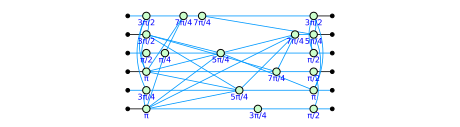

In [18]:
circ = zx.generate.cliffordT(qubit_amount, depth,p_t=0.2)

g = circ.copy()
zx.clifford_simp(g, quiet=True)
g.normalize()
zx.draw_matplotlib(g)

Once we have the reduced diagram, we ask PyZX to extract the circuit:

In [19]:
g2 = g.copy()
c = zx.extract.extract_circuit(g2)
print(c.stats())

Circuit  on 6 qubits with 72 gates.
        10 is the T-count
        62 Cliffords among which
        26 2-qubit gates (0 CNOT, 26 other) and
        26 Hadamard gates.


Now convert it back to a PyZX graph:

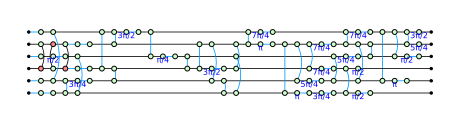

In [20]:
zx.draw_matplotlib(c.to_graph())

And verify that it is still equal to the original graph:

In [21]:
zx.compare_tensors(c.to_tensor(), circ.to_tensor(),preserve_scalar=False)

True

Finally, lets look at this circuit in the QASM circuit description language:

In [22]:
print(c.to_basic_gates().to_qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[6];
cx q[1], q[3];
cx q[3], q[1];
cx q[1], q[3];
h q[5];
h q[3];
h q[2];
h q[1];
h q[0];
h q[4];
h q[3];
h q[1];
cz q[0], q[4];
cz q[0], q[3];
cz q[0], q[1];
rz(0.5*pi) q[2];
rz(1.5*pi) q[0];
h q[2];
h q[5];
h q[0];
cz q[4], q[5];
cz q[2], q[5];
cz q[0], q[2];
rz(0.75*pi) q[4];
rz(0.25*pi) q[2];
h q[4];
h q[2];
cz q[3], q[4];
cz q[2], q[3];
cz q[1], q[3];
rz(1.5*pi) q[3];
h q[3];
cz q[1], q[4];
cz q[1], q[3];
cz q[0], q[1];
rz(1.0*pi) q[1];
h q[1];
cz q[4], q[5];
cz q[2], q[5];
cz q[1], q[5];
cz q[1], q[4];
cz q[1], q[3];
rz(1.0*pi) q[5];
rz(1.75*pi) q[0];
rz(1.25*pi) q[4];
rz(1.75*pi) q[1];
h q[5];
h q[0];
h q[4];
h q[1];
cz q[2], q[4];
cz q[0], q[1];
rz(0.75*pi) q[5];
rz(1.75*pi) q[3];
rz(1.25*pi) q[2];
rz(1.75*pi) q[0];
h q[5];
h q[3];
h q[2];
h q[0];
cz q[3], q[5];
cz q[1], q[4];
cz q[1], q[2];
cz q[0], q[4];
cz q[0], q[2];
cz q[0], q[1];
rz(0.5*pi) q[5];
h q[5];
rz(1.0*pi) q[4];
h q[4];
rz(0.5*pi) q[3];
rz(0.5*pi) q[2];
h q[2];
rz(1.25*pi

### Questions

How does this new circuit compare to the original circuit? What is better? What is worse?

What happened to the T-gates? What happened to the two-qubit gates?


For some circuits, extract_circuit can result in quite large circuits involving many CNOT gates. If one is only interested in optimizing the T-count of a circuit, the extraction stage can be skipped by using the phase-teleportation method of [this paper](https://arxiv.org/abs/1903.10477). This applies full_reduce in such a way that only phases are moved around the circuit, and all other structure remains intact:

What happens if you use this? 

In [23]:
g = c.to_graph()
zx.teleport_reduce(g)
c_opt = zx.Circuit.from_graph(g) # This function is able to reconstruct a Circuit from a Graph that looks sufficiently like a Circuit

Qiskit optimisation is now only supported alongside their transpiler - to do this next bit do part b) first.

Try optimizing the corresponding Qiskit circuit. What do you see?


#### Extensions:

##### 1. Other programs

Try optimising some of the other programs in this tutorial - what happens?

##### 2. Individual ZX rewrites

Try using some of the ZX [simplifications](https://pyzx.readthedocs.io/en/latest/api.html#list-of-simplifications) defined in PyZX.

Below is some code that will help you apply some ZX rules you saw in class.

In [24]:
from ipywidgets import widgets
from IPython.display import display, Markdown

import pyzx.rules as r

class Steps:
    def __init__(self,g):
        self.current  = g.copy()
        self.stepList = [zx.draw_matplotlib(self.current,h_edge_draw='box')]
        self.stepNames = ['start']
    
    def applyXTimes(self,name,match,rule,x):
        for i in range(x):
            self.applyOnce(name,match,rule)
            
    def applyOnce(self,name,match,rule):
        m = match(self.current)
        if len(m) > 0:
            zx.rules.apply_rule(self.current,rule,[m[0]])
            self.stepList.append(zx.draw_matplotlib(self.current,h_edge_draw='box'))
            self.stepNames.append(name)
    
    def to_gh(self):
        zx.to_gh(self.current)
        self.stepList.append(zx.draw_matplotlib(self.current,h_edge_draw='box'))
        self.stepNames.append('to_gh')
    
    def plotter(self,rewrite):
        display(self.stepList[rewrite])
        display(Markdown("**Rewrite step**: " + self.stepNames[rewrite]))
    
    def drawSteps(self):
        self.current.normalize()
        self.stepList.append(zx.draw_matplotlib(self.current))
        self.stepNames.append('rearrange')
        w = widgets.interactive(self.plotter, rewrite=(0,len(self.stepList)-1))
        slider = w.children[0]
        slider.value = 0
        return w

Try using the function `applyXTimes` to apply ZX rules on the diagram above. You can apply some combination of the rules listed below, possibly interleaving them:
- removal of identities (phases with angle 0) `s.applyXTimes('id', r.match_ids, r.remove_ids, x)`,
- spider contraction `s.applyXTimes('spider', r.match_spider, r.spider, x)`;
- local complementation `s.applyXTimes('lcomp', r.match_lcomp, r.lcomp, x)`;
- pivoting `s.applyXTimes('pivot', r.match_pivot, r.pivot, x)`.

Argument `x` indicates how many consecutive times the same rule should be applied. Write your code in the snippet below. The last line on the snippet must be `display(s.drawSteps())`, which will display the derivation you've come up with. A sliding bar should allow you to scroll over the different steps of your derivation (this requires that you have succesfully enabled ipywidgets).

In [ ]:
s = Steps(circ) #Create an instance of the Steps class we just defined


### APPLY THE FIRST ROUND OF RULES HERE ###
s.applyXTimes('spider', r.match_spider, r.spider, 2)




s.to_gh() #Convert all X-phases (red nodes) into Z-phases surrounded by H-boxes. This is a necessary step.

### APPLY THE SECOND ROUND OF RULES HERE ###
s.applyXTimes('spider', r.match_spider, r.spider, 3)




display(s.drawSteps())

### b. Targeting real quantum hardware

To actually *run* a quantum program, the hardware it is going to be run on must be taken into account. The process of taking an existing program and translating it to be expressed in another set of primitives is called transpilation.

Real quantum computers each have a 'native gate set', this is a set of one and two qubit operations that they can actually apply. In fact, most quantum computers can't implement CX gates in one step! To run any quantum circuit or ZX-diagram on a quantum computer, we must transpile it into a form that is amenable to the hardware we want to target.

Furthermore, a real quantum computer can only apply two-qubit gates on qubits that are physically next to each other (or be can be moved next to each other). Typically, this is referred to as routing.

In this exercise we will use the Deutsch-Josza algorithm that we saw in the lecture notes.

First write a Qiskit or QASM implementation of the Deutsch-Josza algorithm for n-qubits.

In [26]:
def Deutsch_Josza(num_qubits:int):

    return ...

We can now target our program to a specific quantum computer. You can choose to try this for any of the following examples.

## Qiskit

Qiskit provides a class called [Target](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.transpiler.Target) which is used to describe specific quantum computers. 

As Qiskit is built and maintained by IBM, you can use a [FakeProvider](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake-provider) that is similar to one of their backends - or even a real one (though this requires an IBMQuantum account).

Have a go modifying and extending the code below to transpile your Deutsch-Josza implementation into a circuit that can be run on a `fake-provider`.

What happens if you try it on a different backend? What if you change some of the transpilation settings? 

Try changing some of the additional arguments to `transpile`. Look [here](https://docs.quantum.ibm.com/api/qiskit/0.27/qiskit.compiler.transpile) for some options. You might want to try changing the `routing_method` or `approximation_degree`.

In [ ]:
%pip install qiskit_ibm_runtime

In [ ]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
 
# Get a fake backend from the fake provider
backend = FakeManilaV2()

circuit = Deutsch_Josza(5)
# Remember to change this into a Qiskit Circuit if you used QASM for the previous step

# Transpile the ideal circuit to a circuit that can be
# directly executed by the backend
transpiled_circuit = transpile(circuit, backend,) # Add options here
transpiled_circuit.draw('mpl', style="iqp")


You can also use the above code to define your own target. Can you try it for the case where you are using 4 qubits, have the gate set {CZ, H, T} and your qubit connectivity graph is:

<img src="connectivity.png.png" alt="drawing" width="300"/>

(Here dots are qubits, and lines are connections.)


## PyZX 

The `extract_circuit` function we saw earlier does not take into account the architecture that the resulting circuit will be run on. PyZX provides functionality to do so by allowing you to define an `Architecture`.

This is called [architecture aware qubit routing](https://pyzx.readthedocs.io/en/latest/simplify.html#architecture-aware-circuit-routing).

First, we define the architecture we want to target. The function `create_architecture` can be used to create a number of pre-defined `Architecture` objects.:

In [ ]:
from pyzx.routing import architecture

# Create a 9-qubit square grid architecture
grid_arch = architecture.create_architecture(architecture.SQUARE, **{"n_qubits":9})
# Note these are implemented using **kwargs, so extra arguments need to be passed as a dictionary

# Create a IBM qx5 architecture
ibm_arch = architecture.create_architecture(architecture.IBM_QX5)

Try defining the same architecture as the one you used above!

(documentation: https://pyzx.readthedocs.io/en/latest/api.html#pyzx.routing.create_architecture)

PyZX can apply routing to phase-polynomial circuits. These circuits are composed of CNOT, XCX, and ZPhase gates, which can be directly translated to phase gadgets in ZX. The module `generate` provides a function for creating such circuits to an architecture.

In [ ]:
c_pp = zx.generate.phase_poly(n_qubits=16, n_phase_layers=10, cnots_per_layer=10)
routed_circuit = zx.routing.route_phase_poly(c_pp, ibm_arch)

### Extension

PyZX does not provide functionality to convert circuits into phase-polynomial circuits.

Either try generating a random phase-polynomial circuit and compare its PyZX routing to its Qiskit routing, or use Qiskit to transpile your circuit into a phase-polynomial circuit and then use PyZX.